ADTA 5410  Applications and Deployment of Advanced Analytics

#### Binaim Abebe Assignment 3  -- Asia 

In [25]:
#Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

#warnings
import warnings
warnings.filterwarnings("ignore")

Step 1: Load the Dataset

In [26]:
#1.	 This question involves the use of simple linear regression on the OWID data set. 
#a.	(8 points) Use the pd.read_csv(…., index_col="…") function to read the data into Python. Call the loaded data covid. Set the date columns as index, 
# using index_col="…". Make sure that you have the directory set to the correct location for the data. Check the first five rows of the data.covid = pd.read_csv('owid-covid-data.csv', index_col="date")

#Read the data into Python.
covid = pd.read_csv('owid-covid-data.csv', index_col="date")
#Check the first five rows of the data.
covid.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-06,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-07,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-08,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-09,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


Step 2: Determine the Number of Rows and Columns

In [27]:
covid_Asia= covid[covid['continent'] == 'Asia']
covid_Asia.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
date,,,,,,,,,,,,,,,,,,,,,
2020-01-05,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-06,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-07,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-08,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2020-01-09,AFG,Asia,Afghanistan,NaN,0.0,NaN,NaN,0.0,NaN,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


In [28]:
#b.How many rows are in this data? How many columns?
#Get the number of rows in the data.

num_rows, num_columns = covid_Asia.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")


Number of rows: 80159
Number of columns: 66


Step 3: Check Column Data Completeness

In [29]:
#c.Check if all of your columns have the same number of data, using .info().
#Check if all of the columns have the same number of data.
covid_Asia.info()


<class 'pandas.core.frame.DataFrame'>
Index: 80159 entries, 2020-01-05 to 2024-06-02
Data columns (total 66 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    80159 non-null  object 
 1   continent                                   80159 non-null  object 
 2   location                                    80159 non-null  object 
 3   total_cases                                 69436 non-null  float64
 4   new_cases                                   75714 non-null  float64
 5   new_cases_smoothed                          75479 non-null  float64
 6   total_deaths                                66286 non-null  float64
 7   new_deaths                                  75714 non-null  float64
 8   new_deaths_smoothed                         75479 non-null  float64
 9   total_cases_per_million                     69436 non-null  float64
 10  n

Step 4: Handle Missing Data

In [30]:
#d.	Fill the missing data as follows:
#i. Fill any missing values (NaN) in the "total_cases" column with 0, using covid['total_cases']=covid['total_cases'].fillna(value=0)

#Fill any missing values (NaN) in the "total_cases" column with 0.
covid_Asia['total_cases']=covid_Asia['total_cases'].fillna(value=0)


In [31]:

#ii.Drop all the rows with missing gdp_per_capita and stringency index, using covid_clean = covid.dropna(subset=['gdp_per_capita','stringency_index'])
#Drop all the rows with missing gdp_per_capita and stringency index.
covid_Asia_clean = covid_Asia.dropna(subset=['gdp_per_capita','stringency_index'])


In [32]:

#iii.	Check the number of rows and columns again. 
# Check the number of rows and columns again
num_rows_clean, num_columns_clean = covid_Asia_clean.shape
print(f"Number of rows after cleaning: {num_rows_clean}")
print(f"Number of columns after cleaning: {num_columns_clean}")


Number of rows after cleaning: 48715
Number of columns after cleaning: 66


Step 5: Perform Simple Linear Regression

In [33]:
#e.	(8 points) Use the sm.OLS() function to perform a simple linear regression with 
# “total_cases” as the response and the following variables (see the table below) as the predictors. 
# Print the regression output and comment on the result. 

#Import the required libraries.
import statsmodels.api as sm

#Perform a simple linear regression with "total_cases" as the response and the following variables as the predictors.
X = covid_Asia_clean[['gdp_per_capita','stringency_index']]
y = covid_Asia_clean['total_cases']

# Add a constant to the predictors
X = sm.add_constant(X)

# Perform simple linear regression
model = sm.OLS(y, X).fit()

predictions = model.predict(X)

#Print the regression output.
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:            total_cases   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     304.1
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          5.86e-132
Time:                        11:27:44   Log-Likelihood:            -8.2192e+05
No. Observations:               48715   AIC:                         1.644e+06
Df Residuals:                   48712   BIC:                         1.644e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             2.768e+06   5.47e+04  

Step 6: Comment on Relationships and R-squared

#f.	Comment on the signs and the significance of the relationships between the predictors and the response variable.

    GDP per Capita: Coefficient: -14.4535 This negative coefficient suggests that as gdp_per_capita increases by one unit, the total_cases decrease by approximately 14.45 cases, holding stringency_index constant. The t-value of -16.813 and the p-value of 0.000 indicate that this relationship is highly statistically significant.

    Stringency Index:Coefficient: -1.714^10^4 This negative coefficient indicates that as the stringency_index increases by one unit, the total_cases decrease by approximately 17,140 cases, holding gdp_per_capita constant. The t-value of -18.439 and the p-value of 0.000 indicate that this relationship is also highly statistically significant.

#g. What percent of the response variable is explained by the predictors? Comment on R-squared.

    Result = R-squared:  0.012

    The R-squared value is 0.012, which means that 1.2% of the response variable is explained by the predictors. This indicates that the predictors (gdp_per_capita and stringency_index) have a very weak relationship with the total_cases variable. 
    The low R-squared value suggests that the predictors do not explain much of the variation in the response variable.



Step 7: Predict total_cases

In [34]:
#h.	What is the predicted “total_cases” associated with the value given in the value column? 
#create the formual
formual = f"total_cases = {model.params[0]} + {model.params[1]} * gdp_per_capita + {model.params[2]} * stringency_index"
print(formual)
print('\n')

values = [2.768e+06 , 40000, 50] # constant, gdp_per_capita, stringency_index
predicted_cases = model.predict([values])
print(f"Predicted total_cases: {predicted_cases}")



total_cases = 2768274.7342537846 + -14.453475843325679 * gdp_per_capita + -17136.375072594998 * stringency_index


Predicted total_cases: [7.66258303e+12]


Step 8: Plot Scatter Plots

array([[<Axes: xlabel='total_deaths', ylabel='total_deaths'>,
        <Axes: xlabel='hospital_beds_per_thousand', ylabel='total_deaths'>,
        <Axes: xlabel='stringency_index', ylabel='total_deaths'>],
       [<Axes: xlabel='total_deaths', ylabel='hospital_beds_per_thousand'>,
        <Axes: xlabel='hospital_beds_per_thousand', ylabel='hospital_beds_per_thousand'>,
        <Axes: xlabel='stringency_index', ylabel='hospital_beds_per_thousand'>],
       [<Axes: xlabel='total_deaths', ylabel='stringency_index'>,
        <Axes: xlabel='hospital_beds_per_thousand', ylabel='stringency_index'>,
        <Axes: xlabel='stringency_index', ylabel='stringency_index'>]],
      dtype=object)

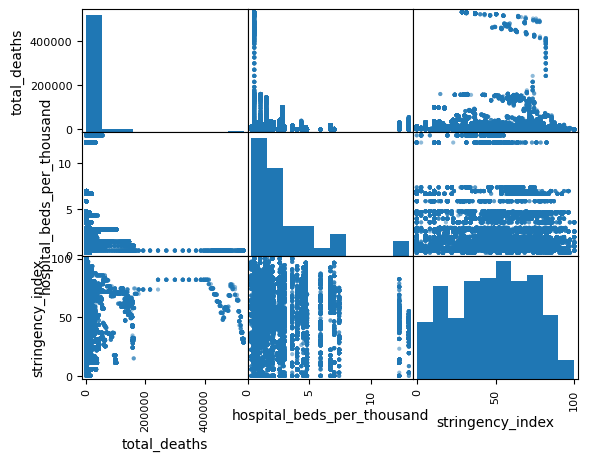

In [35]:
#i. Plot scatter plots of all variables (the response and each of the predictors) using pd.plotting.scatter_matrix(). Comment on the results. 

#Plot scatter plots of all variables using pd.plotting.scatter_matrix().
pd.plotting.scatter_matrix(covid_Asia_clean[['total_deaths','hospital_beds_per_thousand','stringency_index']]) 

2. (BONUS- Up to 10% additional) Create your own question and provide the answer.


Question: How does the total number of COVID-19 cases relate to the population density and the median age of a country's population?

Exploratory Data

In [38]:
#Fill any missing values (NaN) in the "total_cases" column with 0.
# Handle missing values
# Handle missing values by filling with median or a placeholder
covid['total_cases'] = covid['total_cases'].fillna(0)
covid['population_density'] = covid['population_density'].fillna(covid['population_density'].median())
covid['median_age'] = covid['median_age'].fillna(covid['median_age'].median())

In [39]:
import statsmodels.api as sm

# Define response and predictors
X = covid[['population_density', 'median_age']]
y = covid['total_cases']

# Add a constant to the predictors
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the regression output
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            total_cases   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     343.1
Date:                Sun, 23 Jun 2024   Prob (F-statistic):          1.32e-149
Time:                        11:29:23   Log-Likelihood:            -7.7187e+06
No. Observations:              406264   AIC:                         1.544e+07
Df Residuals:                  406261   BIC:                         1.544e+07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.734e+06   2.63

Conclusion
 > The model has very low explanatory power (R-squared of 0.002), suggesting that population_density and median_age alone do not adequately explain the variability in total_cases. The significant p-values for the predictors indicate that these variables have a statistically significant relationship with total_cases, but the practical significance and interpretability of these relationships are questionable. High skewness and kurtosis, along with a large condition number, further point to potential issues with the data and model specification.